In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMI.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

      ID_CIDERH REGION   FECHA_RBE  TEMP_MIN_RBE      LAT_Y      LON_X
0      M_001_AH      I  2006-01-01        -0.309 -20.678125 -68.707308
1      M_001_AH      I  2006-01-02         0.106 -20.678125 -68.707308
2      M_001_AH      I  2006-01-03         0.105 -20.678125 -68.707308
3      M_001_AH      I  2006-01-04        -0.067 -20.678125 -68.707308
4      M_001_AH      I  2006-01-05         3.838 -20.678125 -68.707308
...         ...    ...         ...           ...        ...        ...
48309  M_005_AH      I  2012-12-27        -1.500 -20.325063 -68.894615
48310  M_005_AH      I  2012-12-28        -5.500 -20.325063 -68.894615
48311  M_005_AH      I  2012-12-29        -5.800 -20.325063 -68.894615
48312  M_005_AH      I  2012-12-30        -6.300 -20.325063 -68.894615
48313  M_005_AH      I  2012-12-31        -2.900 -20.325063 -68.894615

[48314 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizTMI.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['TEMP_MIN_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTMI.csv', index=False)

archivo_csv2 = "VMTMI.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

     M_001_AH  M_001_AJ  M_001_Q  M_002_AJ  M_002_H  M_002_Q   M_002_W  \
0      -0.309      10.1      4.7    -8.910   -1.624      1.6  3.043083   
1       0.106       9.4      5.1   -10.970   -2.448      0.8  6.910083   
2       0.105       9.6      5.3    -5.708   -0.702      0.2  6.743250   
3      -0.067      10.8      2.4    -3.423   -1.841      2.7  5.598833   
4       3.838      10.5      4.3    -5.416   -0.042      0.9  7.877000   
..        ...       ...      ...       ...      ...      ...       ...   
923   -10.700       8.8     -1.1   -13.790  -19.640     10.9  4.000000   
924   -10.030       8.2     -4.8   -11.680  -17.310      8.5  1.700000   
925    -7.810       8.4     -1.9   -13.490  -13.620      6.0  4.100000   
926    -5.680      10.2     -2.1   -12.430  -10.040      7.8  1.400000   
927    -6.580       9.2      0.5   -13.070  -15.670      6.2  2.300000   

     M_003_AH  M_003_H  M_003_Q  ...  M_016_A  M_016_H  M_019_A  M_001_W  \
0        -2.9   -0.958     10.2  ..

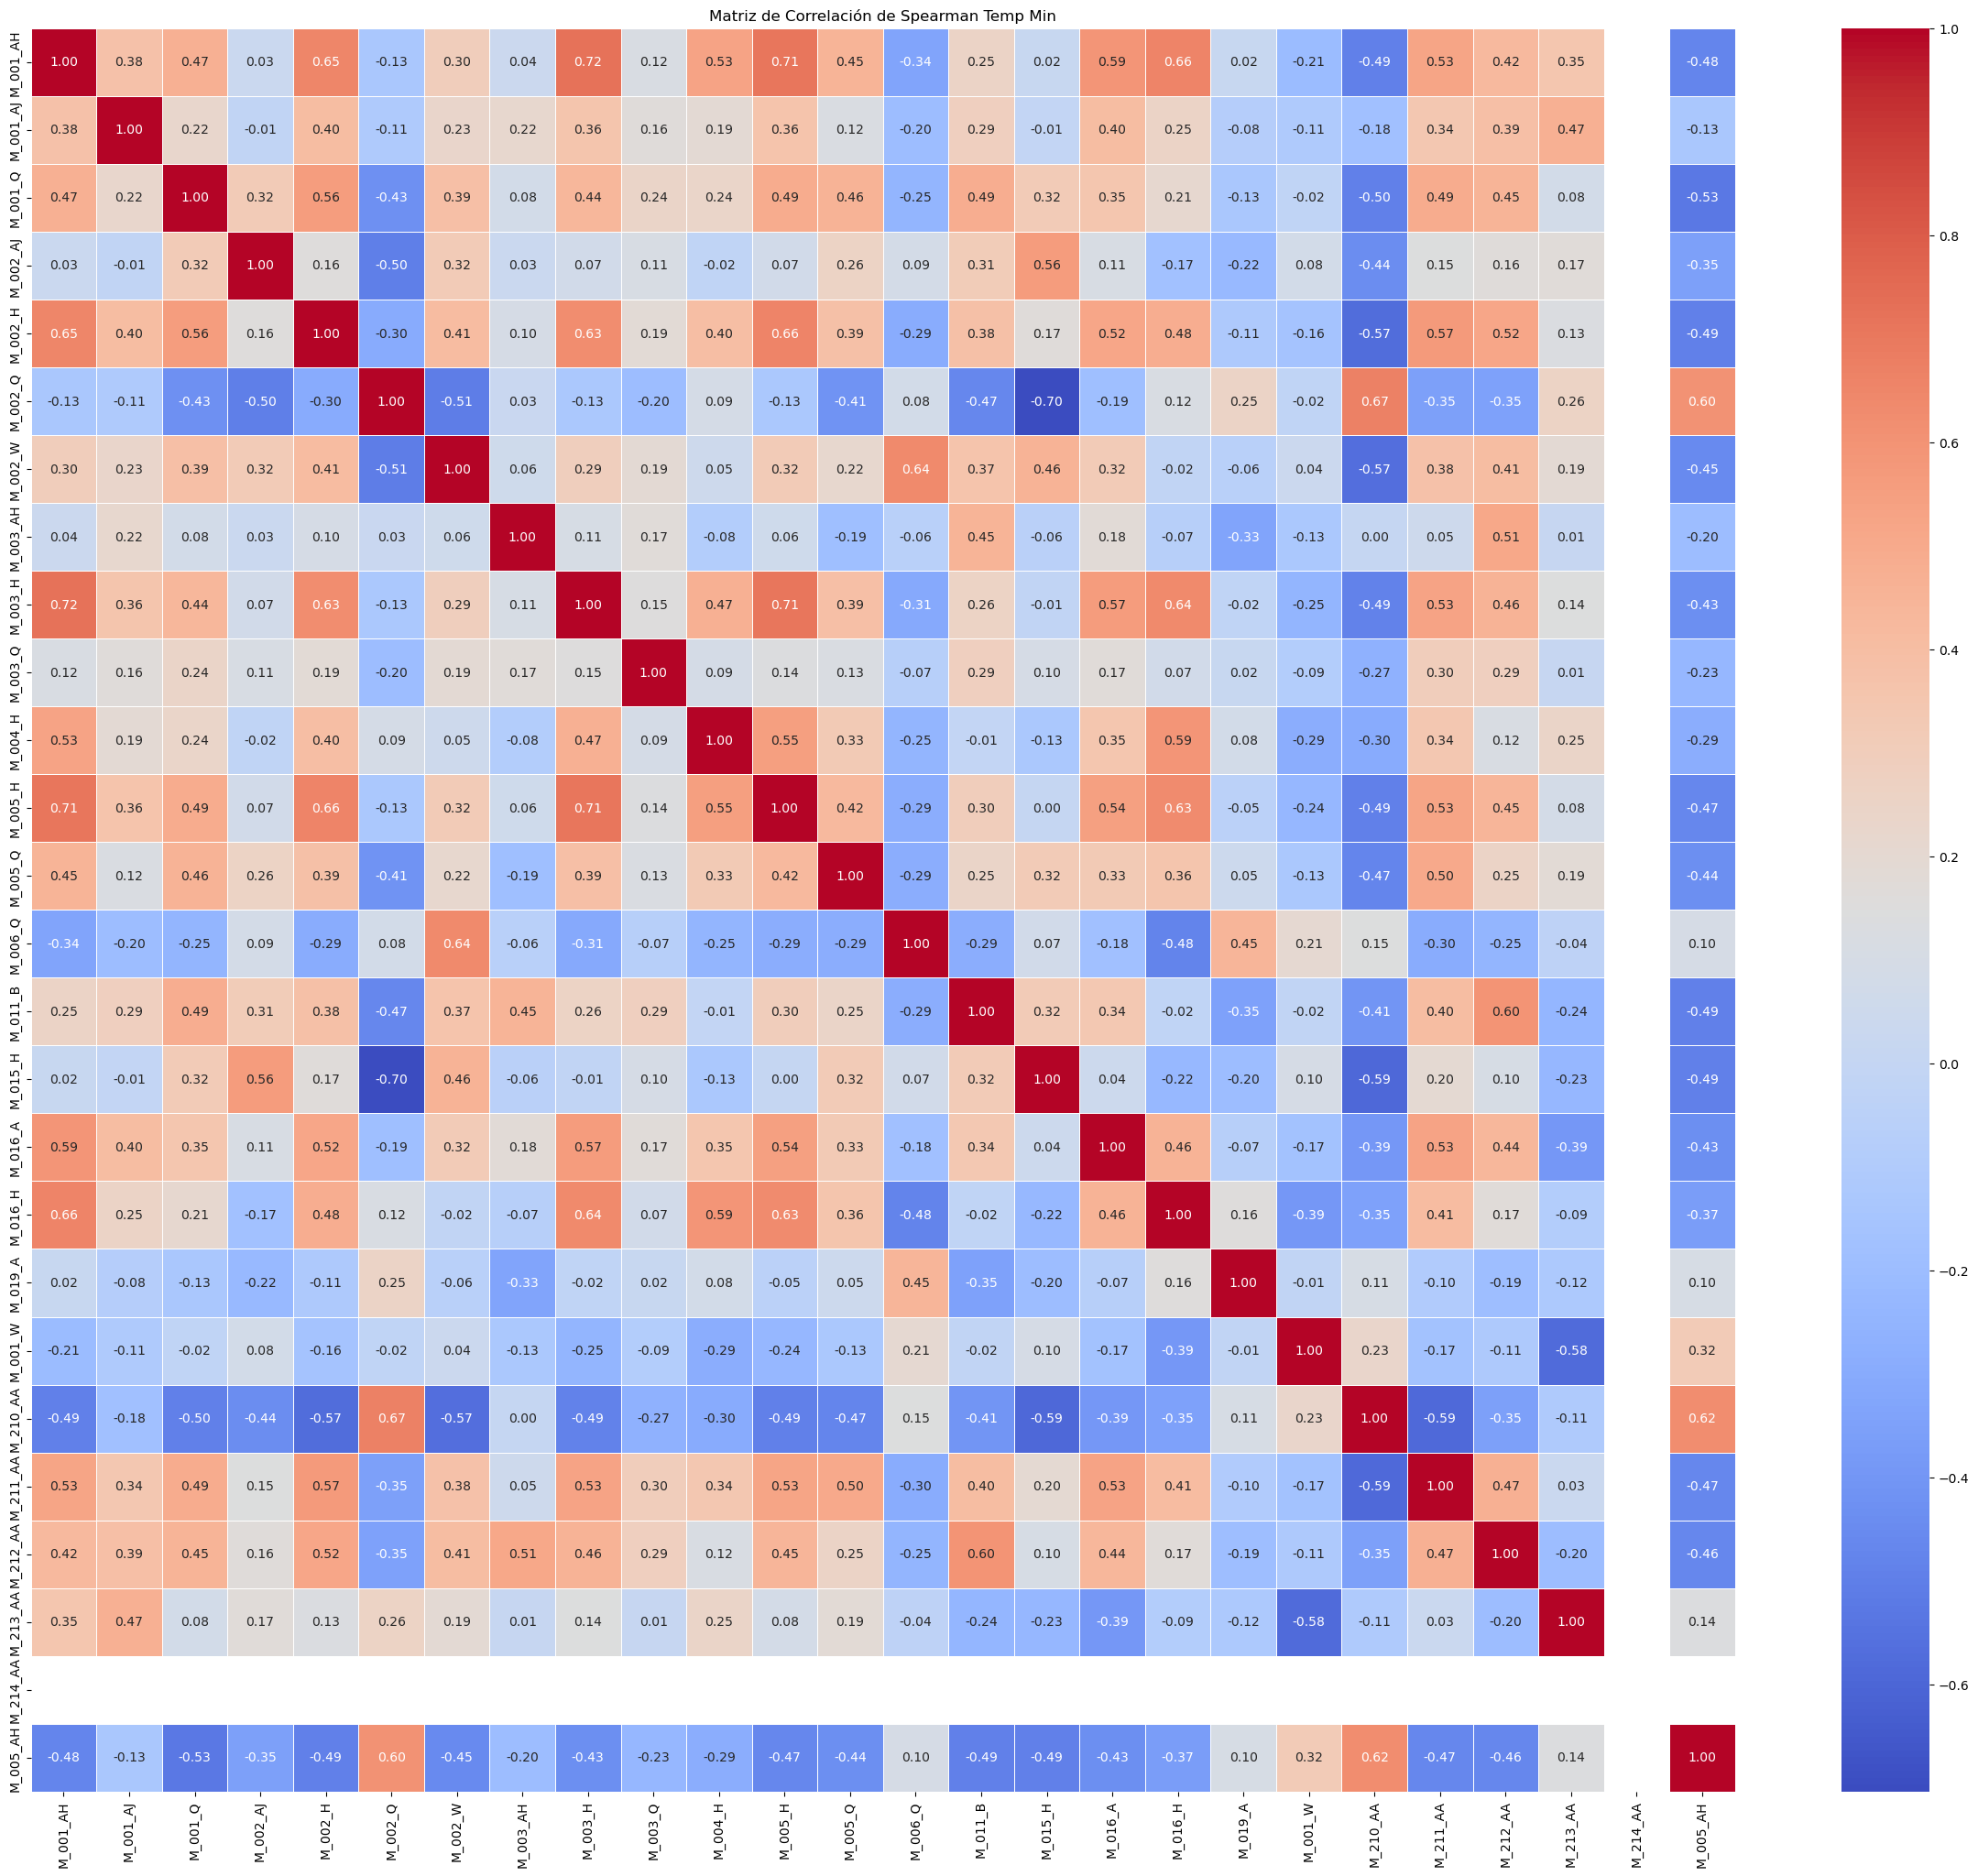

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Min")
plt.show()

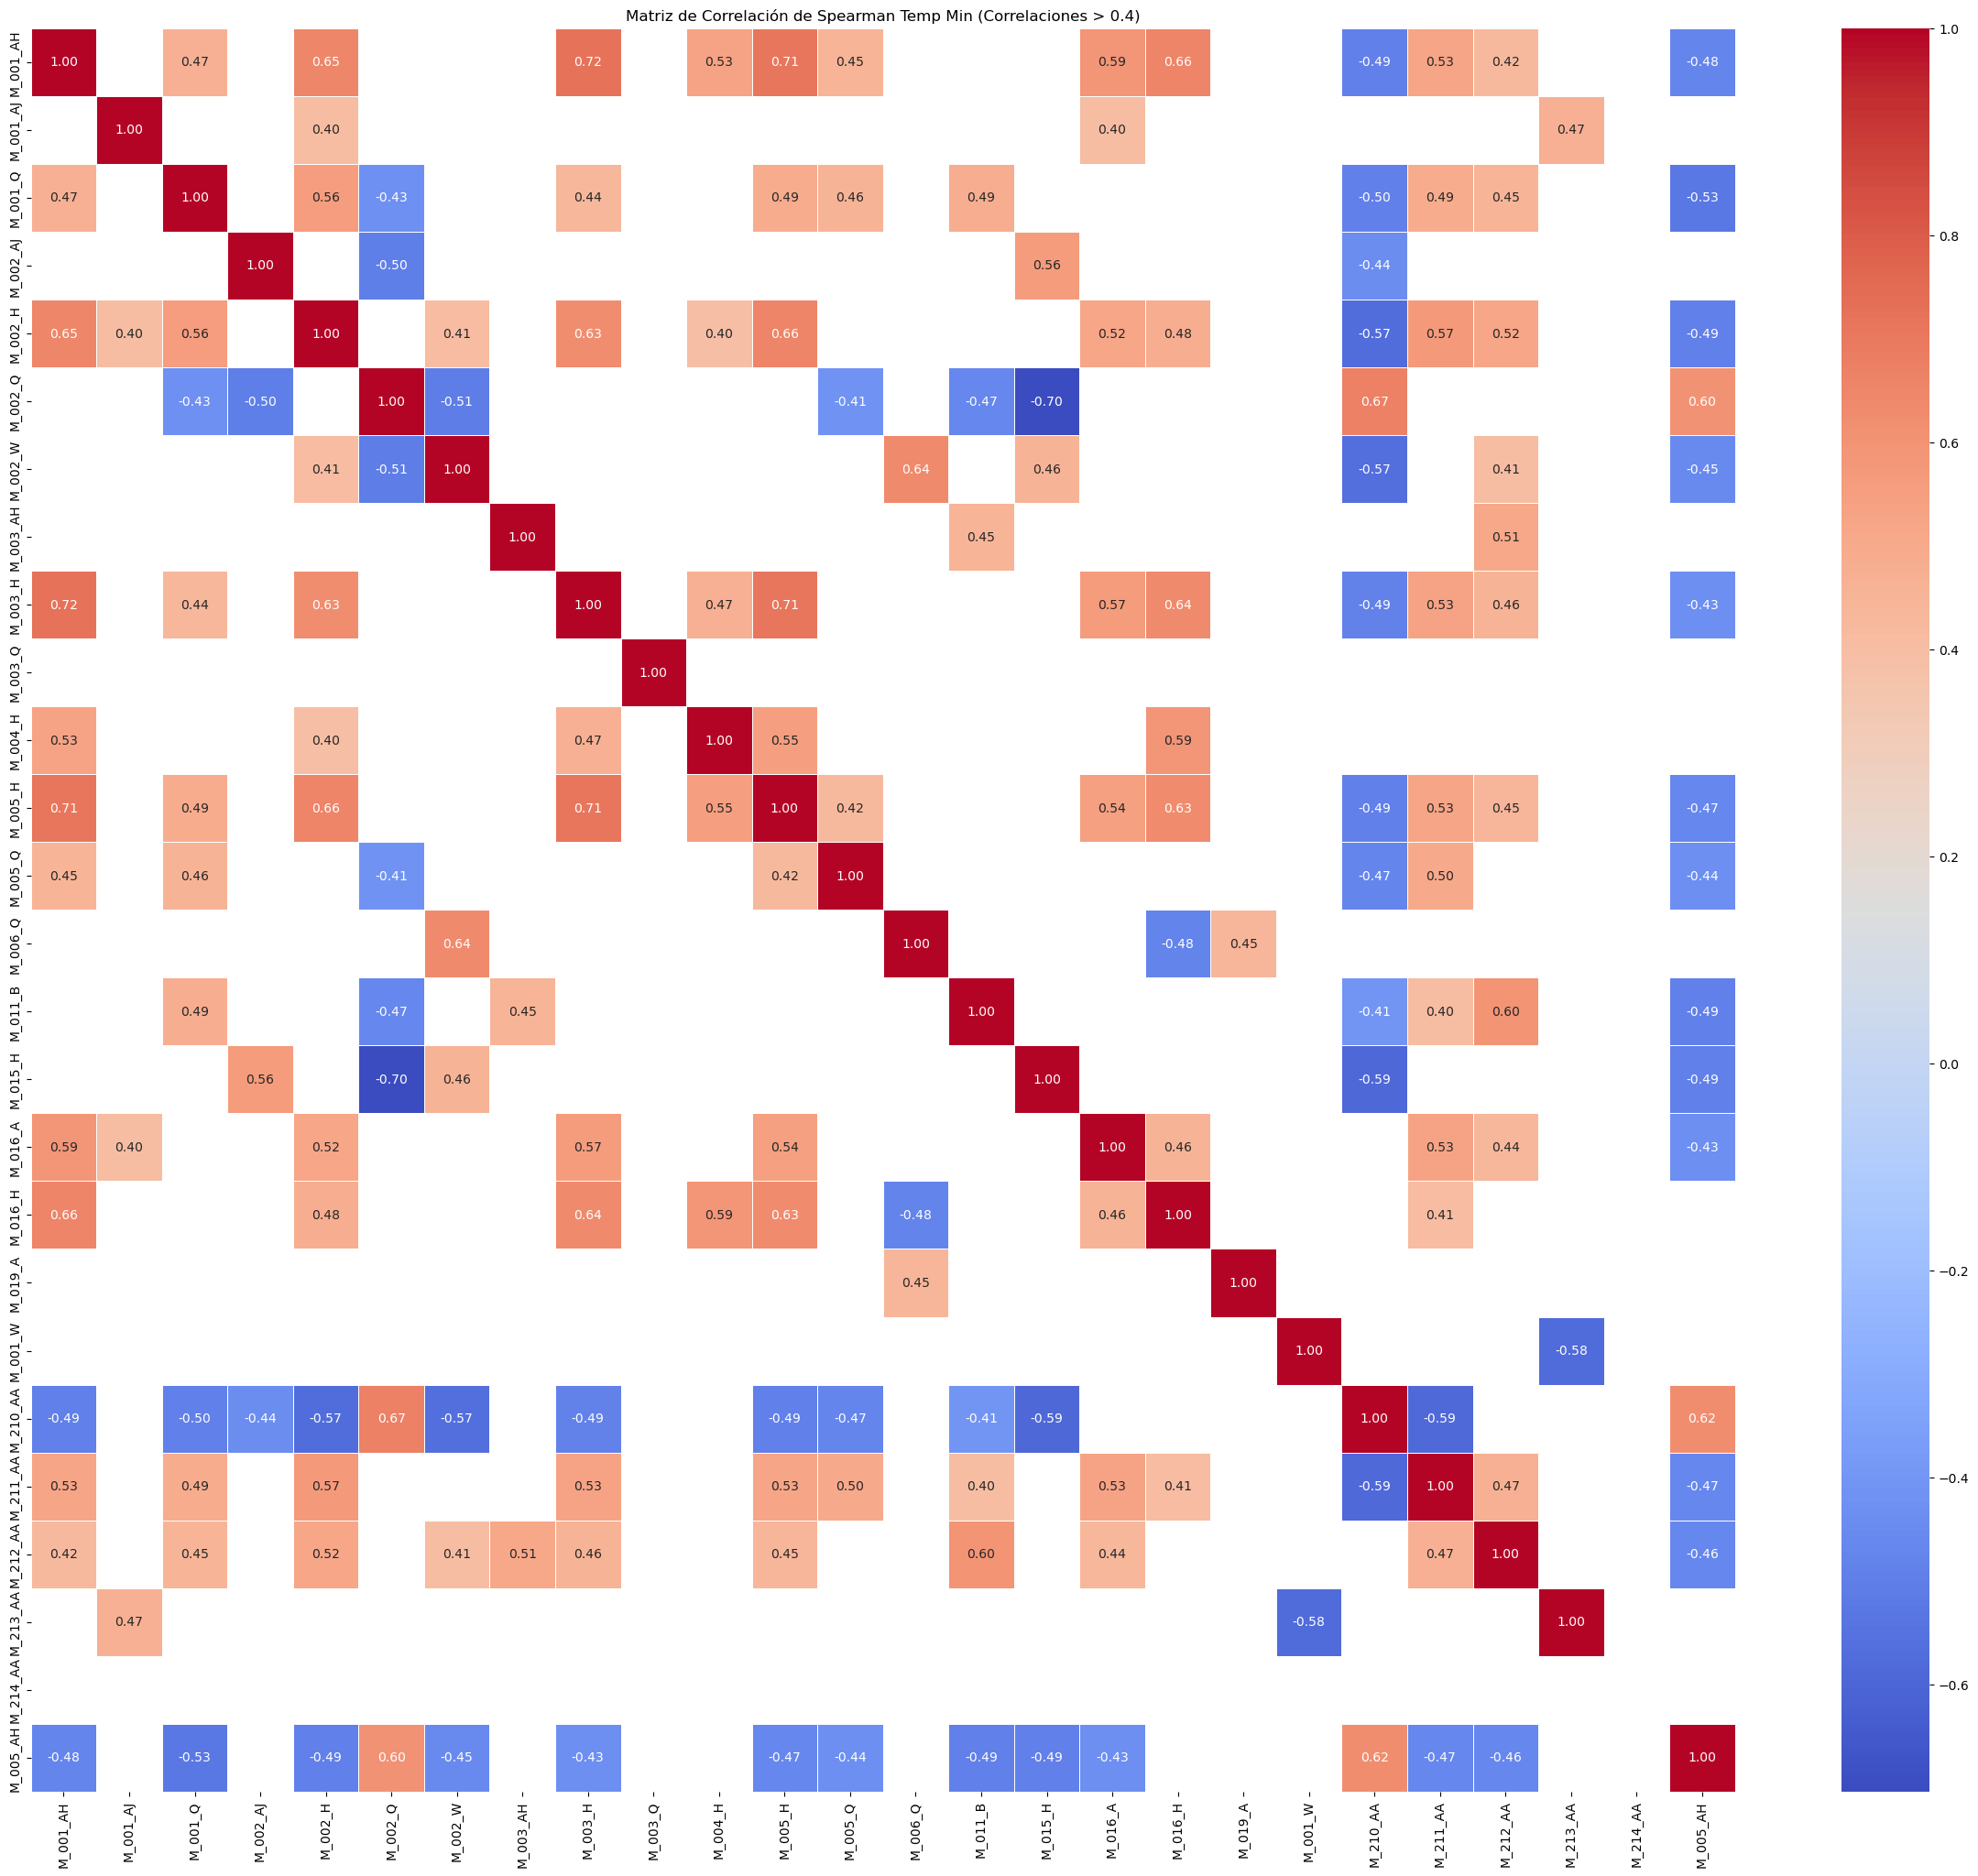

In [4]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Min (Correlaciones > 0.4)")
plt.show()

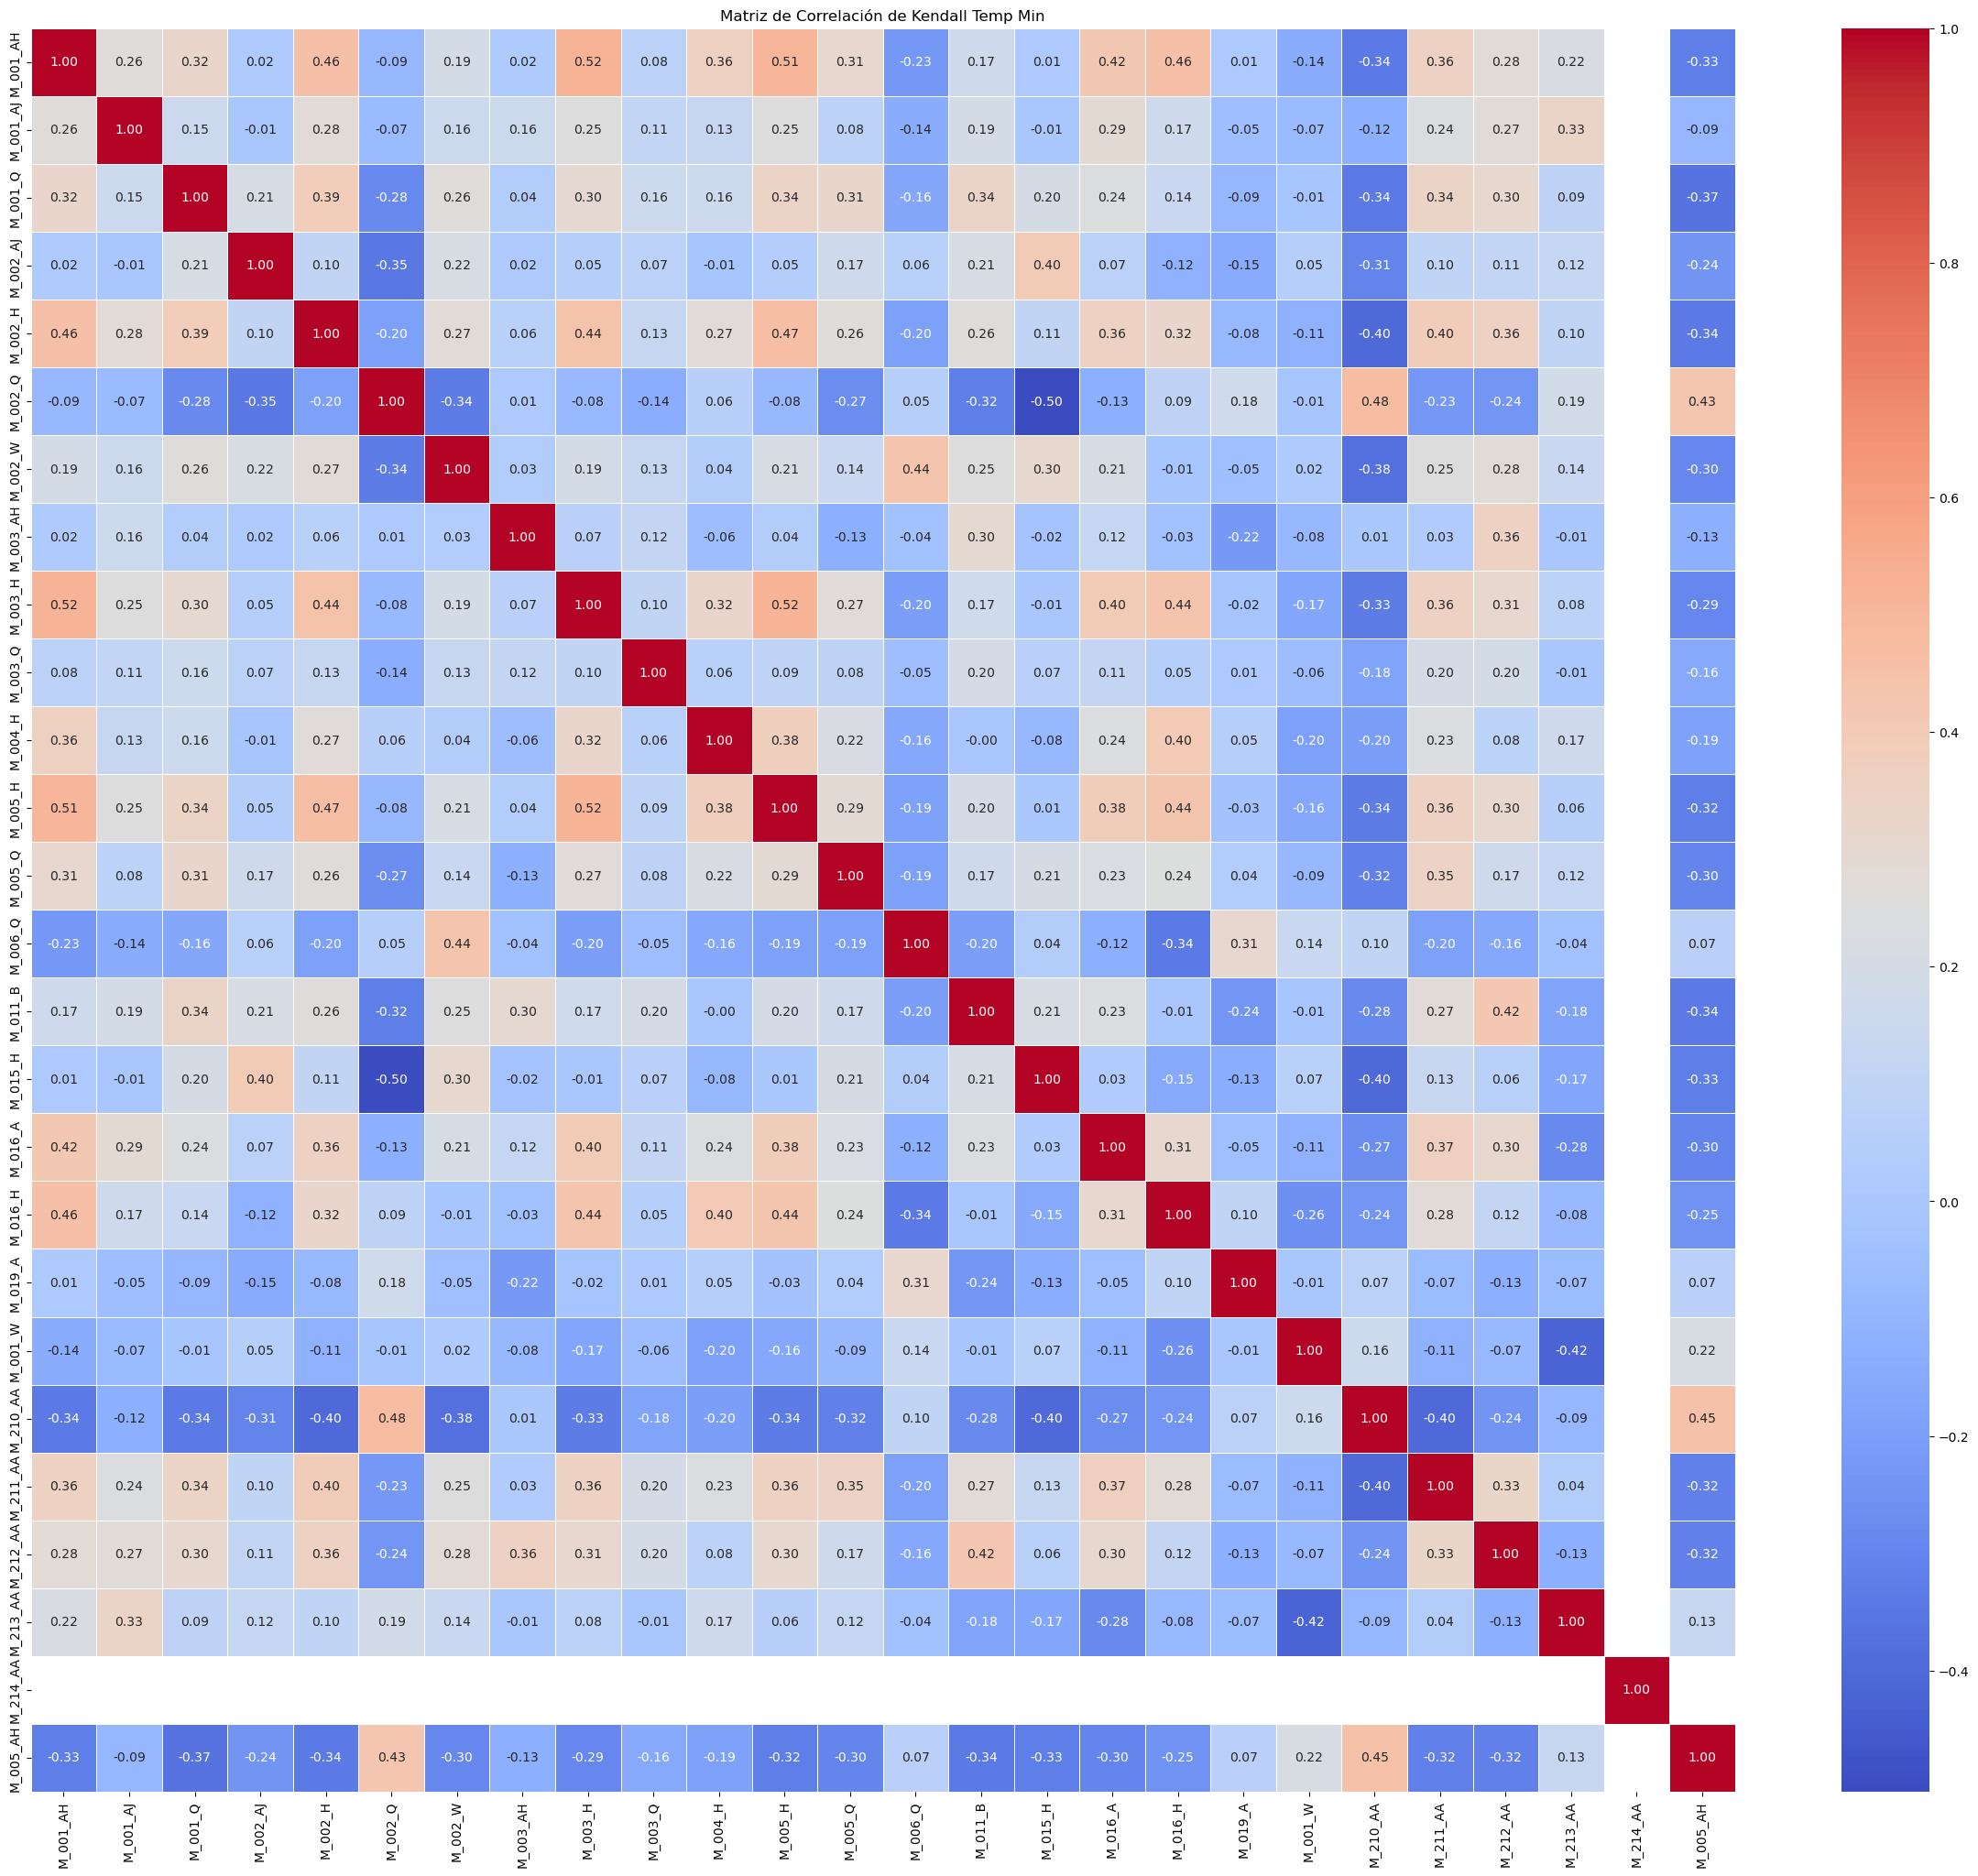

In [5]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall Temp Min")
plt.show()

In [1]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/97.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/97.0 kB ? eta -:--:--
   ---------------------------------------- 97.0/97.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizTMI.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_I.html')

In [3]:
import pandas as pd
from scipy.stats import spearmanr

archivo_csv = "MatrizTMI.csv"
datos = pd.read_csv(archivo_csv)

# Lista de estaciones específicas
estaciones_especificas = ['M_019_A', 'M_006_Q', 'M_002_Q', 'M_005_Q']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MIN_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman para Temperaturas Mínimas')
plt.show()

ID_CIDERH   M_002_Q   M_005_Q   M_006_Q   M_019_A
ID_CIDERH                                        
M_002_Q    1.000000  0.626206  0.920042  0.822425
M_005_Q    0.626206  1.000000  0.777699  0.840834
M_006_Q    0.920042  0.777699  1.000000  0.917876
M_019_A    0.822425  0.840834  0.917876  1.000000


NameError: name 'sns' is not defined